In [1]:
import pandas as pd

In [2]:
# 데이터 로드
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
bts = pd.read_csv('./bus_bts.csv')
jeju_life = pd.read_csv('./jeju_financial_life_data.csv')  # 제주도의 우편번호를 단위로 구분한 제주도 지역민의 금융 생활 통계
weather = pd.read_csv('./weather.csv', encoding='cp949')   # 9월1일~30일 까지의 제주도 전체 오전 10시 기상 정보 데이터
rain = pd.read_csv('./rain.csv', encoding='utf-8')         # 9월1일~30일 까지 고산, 서귀포, 제주, 성산 지점별 오전 6~11시 평균 기상 정보 데이터

### 1. DataSet 접근하여 살펴보기

#### 1-1. 데이터 구조와 결측치 여부 확인

In [3]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
# 결측치가 존재하지 않음.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [5]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [6]:
# 결측치가 존재함.
#'geton_station_name', 'getoff_date', 'getoff_time', 'getoff_stationc_code', getoff_station_name'
bts.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_card_id         2409414 non-null  float64
 1   bus_route_id         2409414 non-null  int64  
 2   vhc_id               2409414 non-null  int64  
 3   geton_date           2409414 non-null  object 
 4   geton_time           2409414 non-null  object 
 5   geton_station_code   2409414 non-null  int64  
 6   geton_station_name   2409365 non-null  object 
 7   getoff_date          1513678 non-null  object 
 8   getoff_time          1513678 non-null  object 
 9   getoff_station_code  1513678 non-null  float64
 10  getoff_station_name  1513639 non-null  object 
 11  user_category        2409414 non-null  int64  
 12  user_count           2409414 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [7]:
jeju_life.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [8]:
# 결측치가 존재하지 않음.
jeju_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_cd               10422 non-null  int64  
 1   year_month           10422 non-null  int64  
 2   x_axis               10422 non-null  float64
 3   y_axis               10422 non-null  float64
 4   sex                  10422 non-null  int64  
 5   age                  10422 non-null  int64  
 6   job_majorc           10422 non-null  float64
 7   job_smallc           10422 non-null  float64
 8   job_public           10422 non-null  float64
 9   job_profession       10422 non-null  float64
 10  job_self             10422 non-null  float64
 11  job_none             10422 non-null  float64
 12  job_other            10422 non-null  float64
 13  avg_income           10422 non-null  int64  
 14  med_income           10422 non-null  int64  
 15  avg_spend            10422 non-null 

In [9]:
weather.head()

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1
3,2019-09-04,약한비단속,24.2,75.0,34.3
4,2019-09-05,구름많음,27.6,79.0,0.1


In [10]:
# 결측치가 존재하지않음.
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      46 non-null     object 
 1   현재일기    46 non-null     object 
 2   현재기온    46 non-null     float64
 3   체감온도    46 non-null     float64
 4   일강수     46 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


In [11]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# 결측치가 존재함.
# '강수량'
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       184 non-null    object 
 1   일시       184 non-null    object 
 2   기온(°C)   184 non-null    float64
 3   강수량(mm)  66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


#### 1-2. 데이터 시각화를 통한 데이터 탐색

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 기호 출력
plt.rc("axes", unicode_minus = False)

# 분석에 문제없는 경고 메시지를 숨김
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 학습데이터 복사본 생성 : 원 데이터의 훼손을 막음
traindata = train.copy()

* 타깃 변수 분포 확인

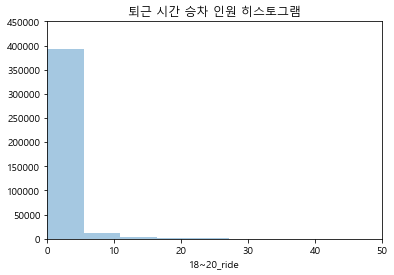

In [15]:
# 0~5명인 구간에 대부분의 값이 존재 -> 0~5 사이의 분포도 살펴보자
sns.distplot(traindata['18~20_ride'], kde=False, bins=50)
plt.axis([0, 50, 0, 450000])
plt.title('퇴근 시간 승차 인원 히스토그램')
plt.show()

In [16]:
# 학습 데이터 타깃 변수의 값 절반 이상이 0이다.
traindata.groupby('18~20_ride').size().head(6)

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

* 요일에 따른 퇴근시간 평균 탑승객 수

In [17]:
# 날짜 관련 변수를 날짜 형으로 casting
traindata['date'] = pd.to_datetime(traindata['date'])

In [18]:
print(train['date'])

0         2019-09-01
1         2019-09-01
2         2019-09-01
3         2019-09-01
4         2019-09-01
             ...    
415418    2019-09-30
415419    2019-09-30
415420    2019-09-30
415421    2019-09-30
415422    2019-09-30
Name: date, Length: 415423, dtype: object


In [19]:
# 요일을 문자형으로 추출해 변수 생성
# strftime() : 날짜와 시간 정보를 문자열로 바꿔준다
# strftime('%a') : 영어로 된 요일 문자열
traindata['weekday'] = traindata['date'].dt.strftime('%a')

In [20]:
print(traindata['weekday'])

0         Sun
1         Sun
2         Sun
3         Sun
4         Sun
         ... 
415418    Mon
415419    Mon
415420    Mon
415421    Mon
415422    Mon
Name: weekday, Length: 415423, dtype: object


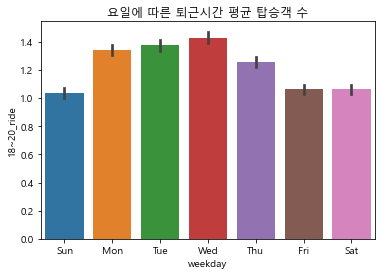

In [21]:
sns.barplot(x='weekday', y='18~20_ride', data=traindata)
plt.title('요일에 따른 퇴근시간 평균 탑승객 수')
plt.show()

##### 버스 종류에 따른 탑승객 수

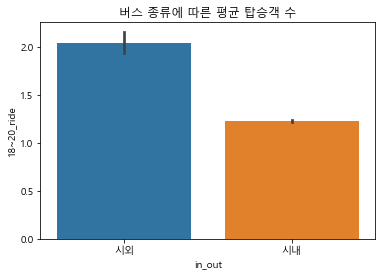

In [22]:
sns.barplot(x='in_out', y='18~20_ride', data=traindata)
plt.title('버스 종류에 따른 평균 탑승객 수')
plt.show()

* 일별 출퇴근 시간 탑승객 수

In [23]:
# 일별 출퇴근 시간의 총 승차 인원 데이터 생성
traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride', '8~10_ride']].agg('sum').reset_index()

eda_data.head()

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0
3,2019-09-04,20133.0,21472.0
4,2019-09-05,20392.0,26331.0


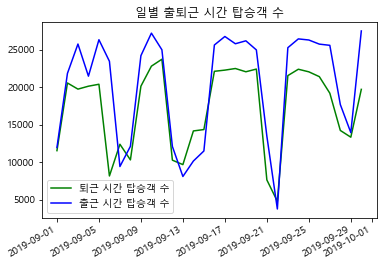

In [24]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.plot('date', '18~20_ride', 'g-', label='퇴근 시간 탑승객 수', data=eda_data)
plt.plot('date', '8~10_ride', 'b-', label='출근 시간 탑승객 수', data=eda_data)
plt.gcf().autofmt_xdate()  # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0)        # 그래프 상에서 최적의 위치에 범례 표시
plt.title('일별 출퇴근 시간 탑승객 수')
plt.show()

### 2. Data 전처리

In [25]:
# 학습 데이터와 테스트 데이터를 구분하기 위한 변수 생성
train['cue'] = 0
test['cue'] = 1

# 학습 데이터와 테스트 데이터 통합
df = pd.concat([train, test], axis=0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 228169
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             643593 non-null  int64  
 1   date           643593 non-null  object 
 2   bus_route_id   643593 non-null  int64  
 3   in_out         643593 non-null  object 
 4   station_code   643593 non-null  int64  
 5   station_name   643593 non-null  object 
 6   latitude       643593 non-null  float64
 7   longitude      643593 non-null  float64
 8   6~7_ride       643593 non-null  float64
 9   7~8_ride       643593 non-null  float64
 10  8~9_ride       643593 non-null  float64
 11  9~10_ride      643593 non-null  float64
 12  10~11_ride     643593 non-null  float64
 13  11~12_ride     643593 non-null  float64
 14  6~7_takeoff    643593 non-null  float64
 15  7~8_takeoff    643593 non-null  float64
 16  8~9_takeoff    643593 non-null  float64
 17  9~10_takeoff   643593 non-nul

#### 2-1. 내부데이터를 통한 변수 생성

* 요일을 나타내는 변수(weekday) 생성

In [27]:
# datetime 변수형으로 casting
df['date'] = pd.to_datetime(df['date'])

# 피처를 숫자로 맵핑
# dt.weekday() : The day of the week with Monday=0, Sunday=6.
df['weekday'] = df['date'].dt.weekday

In [28]:
df[['weekday']]

,weekday
0,6
1,6
2,6
3,6
4,6
...,...
228165,2
228166,2
228167,2
228168,2


* 요일별 평균 탑승객 수를 나타내는 변수(weekdaymean) 생성

In [29]:
# 요일별 평균 탑승 승객수를 구하는 함수
def week_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 'weekdaymean'변수 생성
    df['weekdaymean'] = 1

    # 각 요일에 해당하는 인덱스 추출
    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    # 인덱스를 활용하여 'weekdaymean'의 값을 각 요일에 맞는 평균 탑승 승객수로 변경 
    df.iloc[index0,-1] = train_data.query('weekday==0')['18~20_ride'].mean()
    df.iloc[index1,-1] = train_data.query('weekday==1')['18~20_ride'].mean()
    df.iloc[index2,-1] = train_data.query('weekday==2')['18~20_ride'].mean()
    df.iloc[index3,-1] = train_data.query('weekday==3')['18~20_ride'].mean()
    df.iloc[index4,-1] = train_data.query('weekday==4')['18~20_ride'].mean()
    df.iloc[index5,-1] = train_data.query('weekday==5')['18~20_ride'].mean()
    df.iloc[index6,-1] = train_data.query('weekday==6')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = week_mean()

In [30]:
df

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,weekday,weekdaymean
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.034282
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,6,1.034282
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6,1.034282
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,6,1.034282
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6,1.034282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,NaN,1,2,1.000000
228166,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,2,1.000000
228167,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,2,1.000000
228168,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,2,1.000000


In [31]:
df[['weekdaymean']].head()

,weekdaymean
0,1.034282
1,1.034282
2,1.034282
3,1.034282
4,1.034282


* 버스 종류별 평균 탑승객 수 변수(in_out_mean) 생성

In [32]:
# 버스 종류별 평균 탑승객 수를 구하는 함수
def inout_mean():
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 in_out_mean 변수 생성
    df['in_out_mean'] = 1
    
    # 버스 종류별 인덱스 추출
    in_index = df.query('in_out == "시내"').index
    out_index = df.query('in_out == "시외"').index
    
    # 인덱스를 활용하여 in_out_mean의 값을 각 버스 종류에 맞는 평균 탑승 승객 수로 변경
    df.iloc[in_index, -1] = train_data.query('in_out == "시내"')['18~20_ride'].mean()
    df.iloc[out_index, -1] = train_data.query('in_out == "시외"')['18~20_ride'].mean()
    
    return df

df = inout_mean()    

In [33]:
df[['in_out_mean']].head()

,in_out_mean
0,2.044345
1,2.044345
2,2.044345
3,1.228499
4,1.228499


* 일별 오전 시간대의 총 탑승객 수

In [34]:
# 날짜별 오전 시간에 탑승한 총 탑승객 수
f = df.groupby('date')['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride'].sum().reset_index()

# 변수명 변경
f.columns = ['date', '6~7_ride_sum', '7~8_ride_sum', '8~9_ride_sum', '9~10_ride_sum', '10~11_ride_sum']

# 기존 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, f, how='left', on='date')

In [35]:
df

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0
643589,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0
643590,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0
643591,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0


#### 2-2. 도메인 조사를 통한 변수 생성

* 배차 간격(bus_interval) <br>
배차 간격이 짧으면 수요가 많은 버스임을 유추할 수 있다. <br>
탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 모두 같다면 같은 날 같은 버스에 탑승한 것으로 추정 가능하다. 

In [36]:
# # 탑승 날짜를 datetime 형으로 casting
# bts['geton_time2'] = pd.to_datetime(bts['geton_time'])

# # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호 기준으로 정렬
# f = bts.sort_values(by=['geton_date', 'geton_station_code', 'bus_route_id', 'geton_time2'], ascending=True).reset_index()

In [37]:
# # 반복문 실행 시간이 많이 소요되어 상태 진행률을 확인할 수 있는 tqdm 라이브러리 사용
# from tqdm import notebook

# # 시차를 넣기 위한 빈 리스트
# interval_lst = []
# for i in notebook.tqdm(range(0, len(f)-1)):
#     # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 같다면
#     if((f.iloc[i].geton_date == f.iloc[i+1].geton_date) &
#        (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) &
#        (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):
    
#         # 탑승 날짜의 차를 interval_lst에 추가
#         interval_lst.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)
        
#     # 같지 않다면 0을 interval_lst에 추가
#     else:
#         interval_lst.append(0)
        
# interval_lst.insert(0, '0')

In [38]:
# # interval 변수의 값을 문자형으로 변환 후 시:분:초 형태로 변환
# f['interval'] = interval_lst
# f['interval'] = f['interval'].astype(str).str[7:].replace('', '00:00:00')
# f['bust_route_id'] = f['bus_route_id'].astype(object)

In [39]:
# # interval 변수의 값을 분으로 변환하는 get_min() 함수
# def get_min(time_str):
#     h, m, s = time_str.split(':')
#     return (int(h)*3600 + int(m)*60 + int(s)) / 60

# # interval 함수의 모든 값에 대해 함수 적용하여 나온 값을 time 리스트에 넣기
# time = []
# for i in f['interval']:
#     time.append(get_min(i))
    
# f['time'] = time # time 리스트를 time 변수로 생성
# f['time'] = f['time'].astype(int) # time 변수를 int 타입으로 casting
# f = f[f['time'] > 3]   # 간격이 3분보다 작은 것은 같은 버스에 탑승한 것을 의미하므로 제외한다.
# f = f[f['time'] < 180] # 간격이 3시간보다 큰 것은 자정이 넘어 운영한 마지막 버스와 첫 번째 버스사이의 시차를 구한 것이므로 제외한다.

In [40]:
# # bus_route_id별로 time의 평균값을 bus_interval 변수로 저장
# data = f.groupby('bus_route_id')['time'].agg([('bus_interval', 'mean')]).reset_index()
# data['bus_interval'] = data['bus_interval'].astype(int)

# # 변수 생성에 많은 시간이 소요되므로 csv 파일로 저장
# data.to_csv('bus_interval.csv', index=False)

In [41]:
df

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,18~20_ride,cue,weekday,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0,6,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,53.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0,6,1.034282,1.228499,2942.0,4518.0,5682.0,6275.0,6774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0
643589,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0
643590,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0
643591,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,...,NaN,1,2,1.000000,1.000000,4771.0,14195.0,12602.0,9143.0,7757.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 643592
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              643593 non-null  int64         
 1   date            643593 non-null  datetime64[ns]
 2   bus_route_id    643593 non-null  int64         
 3   in_out          643593 non-null  object        
 4   station_code    643593 non-null  int64         
 5   station_name    643593 non-null  object        
 6   latitude        643593 non-null  float64       
 7   longitude       643593 non-null  float64       
 8   6~7_ride        643593 non-null  float64       
 9   7~8_ride        643593 non-null  float64       
 10  8~9_ride        643593 non-null  float64       
 11  9~10_ride       643593 non-null  float64       
 12  10~11_ride      643593 non-null  float64       
 13  11~12_ride      643593 non-null  float64       
 14  6~7_takeoff     643593 non-null  flo

In [43]:
# 데이터 병합 : 배차 간격 변수 병합
import numpy  as np
df['bus_route_id'] = df['bus_route_id'].astype(np.int64)
bus_interval = pd.read_csv('bus_interval.csv')

# 기존의 df에 새로운 변수를 병합
# df에는 있지만 bus_bts 데이터에는 없는 버스 노선번호로 인해 결측치 발생.
# 배차 간격이 짧을수록 수요가 많은 버스임을 의미하므로, 결측치는 9999로 채운다.
df = pd.merge(df, bus_interval, how='left', on='bus_route_id')
df['bus_interval'] = df['bus_interval'].fillna(9999) 

In [44]:
df[['bus_interval']].head()

,bus_interval
0,34.0
1,34.0
2,34.0
3,34.0
4,34.0


* 수요가 많을 것으로 예상되는 정류장(school, transfer) <br>
(1) 정류장명을 통해 고등학교와 대학교 근처 정류장을 구분하는 school 변수와<br>
(2) 환승 정류장 transfer 변수

In [45]:
#school 변수 생성

# 정류장명에 '고등학교'가 포함되어 있는 행 뽑기
highschool_station = df[df['station_name'].str.contains('고등학교')]
# '고등학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
highschool =  list(highschool_station['station_name'].unique())

# 정류장명에 '대학교'가 포함되어 있는 행 뽑기
university_station = df[df['station_name'].str.contains('대학교')]
# '고등학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
university =  list(university_station['station_name'].unique())

In [46]:
# '고등학교'와 '대학교' 근처 정류장 구분 함수
def schoolstation(x):
    if x in highschool:
        return 1
    elif x in university:
        return 1
    else:
        return 0
    
# 모든 정류장명에 대해 적용
df['school'] = df['station_name'].apply(schoolstation)

In [47]:
df[['school']].head()

,school
0,0
1,0
2,0
3,0
4,0


In [48]:
#transfer 변수 생성

# 정류장명에 '환승'가 포함되어 있는 행 뽑기
transfer_station = df[df['station_name'].str.contains('환승')]
# '환승'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
transfer =  list(transfer_station['station_name'].unique())

# 정류장명에 '공항'가 포함되어 있는 행 뽑기
airport_station = df[df['station_name'].str.contains('공항')]
# '공항'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
airport =  list(airport_station['station_name'].unique())

# 정류장명에 '터미널'가 포함되어 있는 행 뽑기
terminal_station = df[df['station_name'].str.contains('터미널')]
# '터미널'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
terminal =  list(terminal_station['station_name'].unique())

In [49]:
# 정류장 구분 함수
def transfer_station(x):
    if x in transfer:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    else:
        return 0
    
# 모든 정류장명에 대해 적용
df['transfer'] = df['station_name'].apply(transfer_station)

In [50]:
df[['transfer']].head()

,transfer
0,0
1,0
2,0
3,1
4,0


* 연휴(holiday) <br>
train 데이터는 연휴 기간을 포함하고 있다. 연휴기간엔 평소와 다른 수요패턴이 나타나므로 holiday 변수를 생성한다.

In [51]:
# 날짜에서 연휴 구분 함수
def holiday_function(x):
    # 공휴일이라면 1을 반환
    if x in['2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09']:
        return 1
    else:
        return 0
    
# 모든 날짜에 적용
df['holiday'] = df['date'].apply(holiday_function)

In [52]:
df[['holiday']].head()

,holiday
0,0
1,0
2,0
3,0
4,0


* 시간대를 활용한 변수<br>
오전 시간대를 활용해 변수를 만든다. <br>
(1) t~t+2 승하차 시간대 통합 변수 <br>
(2) 오전 시간의 승객 수 <br>

* (1) t~t+2 승하차 시간대 통합 변수 <br>
기존 학습 데이터의 오전 시간대는 1시간마다 승하차 인원수를 표시하고 있지만, 예측하려는 퇴근 시간대는 2시간마다 승차 인원을 예측해야한다. 따라서 2시간 간격으로 승하자 시간대를 통합한 변수를 생성한다. <br>
승차와 하차의 구분을 위해 승차인원을 나타내는 변수명에는 a를 붙이고, 하차인원을 나타내는 변수명에는 b를 붙인다.

In [53]:
# 오전 시간대에 2시간동안 승차한 인원 수의 합계
df['68a'] = df['6~7_ride'] + df['7~8_ride']
df['810a'] = df['8~9_ride'] + df['9~10_ride']
df['1012a'] = df['10~11_ride'] + df['11~12_ride']

# 오전 시간대에 2시간동안 하차한한 인원 수의 합계
df['68b'] = df['6~7_takeoff'] + df['7~8_takeoff']
df['810b'] = df['8~9_takeoff'] + df['9~10_takeoff']
df['1012b'] = df['10~11_takeoff'] + df['11~12_takeoff']

In [54]:
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,34.0,0,1,0,17.0,32.0,30.0,0.0,0.0,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,34.0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


* (2) 오전 시간의 승객 수 <br>
오전 시간에 버스를 승하차한 승객 수가 많다면 퇴근 시간의 승차 인원도 증가할 것이다 <br>
이와 같은 가정을 토대로 오전 시간대 승차 승객 수와 하차 승객 수의 합계와 평균을 나타내는 변수를 추가한다.

In [55]:
# 오전 시간(6시~12시)에 승차한 승객 수의 합계
df['ride_sum'] = df[['6~7_ride','7~8_ride', '8~9_ride', '10~11_ride', '11~12_ride']].sum(axis=1)

#오전 시간(6시~12시)에 하차한 승객 수의 합계
df['takeoff_sum'] = df[['6~7_takeoff','7~8_takeoff', '8~9_takeoff', '10~11_takeoff', '11~12_takeoff']].sum(axis=1)

위의 변수에 '노선' 기준을 추가하여 <br>
'노선별 오전 시간대의 총, 평균 탑승객 수'를 구한다

In [56]:
# bus_route_id와 station_code를 결합해 route_station 생성
df['route_station'] = df['bus_route_id'].astype(str) + ','  + df['station_code'].astype(str)

# 버스 노선별 오전 시간의 총 탑승객 수와 평균 탑승객 수 구하기
data = df.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()

# 변수명을 1012a_sum, 1012a_mean 으로 변경
data.rename(columns={'mean':'1012a_mean', 'sum':'1012a_sum'}, inplace=True)

# 기존 df에 새로운 변수 병합
df = pd.merge(df, data, how='left', on='route_station')

In [57]:
df[['1012a_mean', '1012a_sum']].head()

,1012a_mean,1012a_sum
0,5.304348,244.0
1,11.608696,534.0
2,2.304348,106.0
3,36.673913,1687.0
4,0.564103,22.0


* bus_bts를 활용한 변수 <br>
학습데이터와 테스트데이터의 X~Y_ride 변수의 합과 bus_bts 데이터의 user_count 변수의 합은 같으므로, <br>
bus_bts.csv를 통해 탑승한 승객의 정보를 파악할 수 있다.

(1) 카테고리별 승객 수의 합과 비율 <br>
bus_bts의 user_category 변수를 이용하여 학습데이터와 테스트데이터에 카테고리별 승객 수의 합과 비율 변수를 추가한다. <br>
승객 정보를 통해 특정 버스 정류장에 어떤 승객이 많이 탑승하는지 알 수 있을 것이다.

In [58]:
# 카테고리(user_category)별 승객 수의 합 
def category_people():
    # df와 병합을 위해 bus_route_id의 타입을 str로 변환
    bts['bus_route_id'] = bts['bus_route_id'].astype(str)

    # bus_route_id와 user_category별 승객 수의 합
    f = bts.groupby(
        ['bus_route_id','user_category']
    )['user_count'].agg([('승객수', 'sum')]).reset_index()

    # bus_route_id별 user_category 변수의 승객수의 피벗 테이블 형태로 변환
    g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                       columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult','kids','teen','elder','jang','jang2',
                 'ugong','ugong2']
    g = g[['bus_route_id', 'adult','kids','teen','elder']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, g, how='left', on='bus_route_id')
                 
    return merge_data

# bus_route_id의 타입을 str로 통일시켜준 뒤, 함수를 실행하여 변수 생성
df['bus_route_id'] = df['bus_route_id'].astype(str)
df = category_people()

In [59]:
df[['adult', 'kids', 'teen', 'elder']].head()

,adult,kids,teen,elder
0,8158.0,72.0,38.0,0.0
1,8158.0,72.0,38.0,0.0
2,8158.0,72.0,38.0,0.0
3,8158.0,72.0,38.0,0.0
4,8158.0,72.0,38.0,0.0


In [60]:
# 카테고리(user_category)별 승객 수의 비율
def category_people_ratio():
    # bus_route_id별 user_category의 전체 합
    f_all = bts.groupby('bus_route_id')['user_count'].agg([('전체', 'sum')]).reset_index()
    
    # bus_route_id와 user_category별 승객 수의 합
    f_sum = bts.groupby(['bus_route_id','user_category']
                       )['user_count'].agg([('승객수', 'sum')]).reset_index()
    
    # 승객 수의 합을 전체 합으로 나눠줘 비율을 구함
    data = pd.merge(f_all, f_sum, on='bus_route_id')
    data['비율'] = data['승객수'] / data['전체']

   # 피벗 테이블을 통해 bus_route_id별 user_category변수의 승객 비율 형태로 변환
    data = pd.pivot_table(data, values='비율', index='bus_route_id', 
                          columns='user_category',fill_value=0).reset_index()
    data.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop',
                    'elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = data[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, f, how='left', on='bus_route_id')

    return merge_data

# 함수를 실행하여 변수 생성
df = category_people_ratio()

In [61]:
df[['adult_prop','kids_prop','teen_prop','elder_prop']].head()

,adult_prop,kids_prop,teen_prop,elder_prop
0,0.986696,0.008708,0.004596,0.0
1,0.986696,0.008708,0.004596,0.0
2,0.986696,0.008708,0.004596,0.0
3,0.986696,0.008708,0.004596,0.0
4,0.986696,0.008708,0.004596,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 643592
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              643593 non-null  int64         
 1   date            643593 non-null  datetime64[ns]
 2   bus_route_id    643593 non-null  object        
 3   in_out          643593 non-null  object        
 4   station_code    643593 non-null  int64         
 5   station_name    643593 non-null  object        
 6   latitude        643593 non-null  float64       
 7   longitude       643593 non-null  float64       
 8   6~7_ride        643593 non-null  float64       
 9   7~8_ride        643593 non-null  float64       
 10  8~9_ride        643593 non-null  float64       
 11  9~10_ride       643593 non-null  float64       
 12  10~11_ride      643593 non-null  float64       
 13  11~12_ride      643593 non-null  float64       
 14  6~7_takeoff     643593 non-null  flo

위의 두 변수를 df와 병합하는 과정에서 bus_bts에 존재하지 않는 bus_route_id가 df에 조재해 결측치가 발생할 수 있다. 따라서 카테고리별 승객 수와 승객 비율의 평균값으로 결측치를 대체한다.


In [63]:
from sklearn.impute import SimpleImputer

na_col = ['adult', 'kids', 'teen', 'elder', 'adult_prop','kids_prop','teen_prop','elder_prop']
imputer = SimpleImputer(strategy='mean')
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns=na_col)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 643592
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              643593 non-null  int64         
 1   date            643593 non-null  datetime64[ns]
 2   bus_route_id    643593 non-null  object        
 3   in_out          643593 non-null  object        
 4   station_code    643593 non-null  int64         
 5   station_name    643593 non-null  object        
 6   latitude        643593 non-null  float64       
 7   longitude       643593 non-null  float64       
 8   6~7_ride        643593 non-null  float64       
 9   7~8_ride        643593 non-null  float64       
 10  8~9_ride        643593 non-null  float64       
 11  9~10_ride       643593 non-null  float64       
 12  10~11_ride      643593 non-null  float64       
 13  11~12_ride      643593 non-null  float64       
 14  6~7_takeoff     643593 non-null  flo

* 좌표를 활용한 변수 <br>
인적이 드문 지역의 버스정류장에서는 버스가 많이 다니지않고 버스에 탑승하는 승객 또한 매우 적다. <br>
버스 정류장의 위치는 버스 승차 인원에도 영양을 주므로 좌표를 활용한 변수를 생성한다.

(1) 버스 정류장과 인구 밀집 지역 사이의 거리 (dis_jejusi, dis_seoquiposi) <br>
인구가 밀집된 곳일수록 탑승객 또한 많을 것이라 예상가능하다. <br>
인구 밀집지역은 서귀포시와 제주시 이다.

In [65]:
import geopy.distance

In [66]:
# coords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도
# coords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도

# # 제주시와의 거리
# df['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_jejusi).km for i in range(len(df))]
# # 서귀포시와의 거리
# df['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_seoquiposi).km for i in range(len(df))]

In [67]:
# df[['dis_jejusi', 'dis_seoquiposi']].head()

(2) 탑승하는 승객의 수가 많은 버스 정류장과의 거리 <br>
유동인구가 많은 지역과 가까울수록 탑승객 수가 많을 것이라 예상 가능하다. <br>
따라서 학습데이터를 퇴근시간 승차인원을 기준으로 내림차순으로 정렬한다. <br>
그리고 상위 10개의 버스 정류장 좌표와의 거리 변수를 생성한다.

In [68]:
# # 승차 인원 상위 10개의 버스정류장 좌표
# coords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도
# coords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도
# coords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도
# coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
# coords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도
# coords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도
# coords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도
# coords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도
# coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
# coords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도

In [69]:
# # 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함
# df['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(df))]
# df['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(df))]
# df['dis_hallahosp'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(df))]
# df['dis_rotary'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_rotary).km for i in range(len(df))]
# df['dis_jejucenterhigh'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_jejucenterhigh).km for i in range(len(df))]
# df['dis_jejumarket'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_jejumarket).km for i in range(len(df))]
# df['dis_jejusclass'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_jejusclass).km for i in range(len(df))]
# df['dis_centerroad'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_centerroad).km for i in range(len(df))]
# df['dis_fiveway'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_fiveway).km for i in range(len(df))]
# df['dis_law'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
#     df['longitude'].iloc[i]), coords_law).km for i in range(len(df))]

#### 2-3. 외부데이터를 통한 변수 생성

* 날씨를 활용한 변수

(1) 버스 정류장과 각 측정소의 거리 <br>
날씨 관련 변수 생성에 앞서, 각 벅스 정류장별 가장 가까운 측정소에 대한 변수를 먼서 생성해야한다. <br>
그리고 버스 정류장이 어느 지역에 해당하는지 알기 위해서는 버스 정류장과 측정소 간 거리가 필요하다. 제주도에 존재하는 4개의 측정소의 위치를 활용해 해당 지역과 버스 정류장의 거리를 각각의 변수로 추가한다.

In [70]:
# 측정소별 위도, 경도
jeju = (33.51411, 126.52969) # 제주 측정소 근처
gosan = (33.29382, 126.16283) # 고산 측정소 근처
seongsan = (33.38677, 126.8802) # 성산 측정소 근처
po = (33.24616, 126.5653) # 서귀포 측정소 근처

In [71]:
# # 버스정류장과 제주 측정소와의 거리
# t1 = [geopy.distance.geodesic((i,j), jeju).km
#       for i,j in list(zip(df['latitude'], df['longitude']))]
# df['dis_jeju'] = t1

# # 버스정류장과 고산 측정소와의 거리
# t2 = [geopy.distance.geodesic((i,j), gosan).km
#       for i,j in list(zip(df['latitude'], df['longitude']))]
# df['dis_gosan']=t2

# # 버스정류장과 성산 측정소와의 거리
# t3 = [geopy.distance.geodesic((i,j), seongsan).km
#       for i,j in list(zip(df['latitude'], df['longitude']))]
# df['dis_seongsan']=t3

# # 버스정류장과 서귀포 측정소와의 거리
# t4 = [geopy.distance.geodesic((i,j), po).km
#       for i,j in list(zip(df['latitude'], df['longitude']))]
# df['dis_po']=t4

#### 2-4-1. 라벨인코딩<br>
문자열로 된 변수의 값들을 등장하는 순서대로 넝버링해서 숫자형으로 변환시킨다.

* 시내 시외(in_out)

In [72]:
df['in_out']

0         시외
1         시외
2         시외
3         시내
4         시내
          ..
643588    시내
643589    시내
643590    시내
643591    시내
643592    시내
Name: in_out, Length: 643593, dtype: object

In [73]:
df['in_out'] = df['in_out'].map({'시내':0, '시외':1})

* 주중 및 주말

In [76]:
def is_weekend(x):
    if x == 5: # 토요일
        return 1
    elif x == 6: # 일요일
        return 1
    else:
        return 0
    
# 'weekday’변수에 is_weekend함수를 적용하여 'weekend' 변수 생성      
df['weekend'] = df['weekday'].apply(is_weekend)

In [79]:
df[['weekend']].head()

,weekend
0,1
1,1
2,1
3,1
4,1


* 시, 동

#### 2-4-2. 원핫인코딩<br>
범주형 변수를 수치형 변수로 변환한다.

### 3. 모델 구축과 검증